# *Sales Analysis of E-Commerce*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# We have Sales files of 12 months of year 2019 in separate files. At first we need to combile all files in one single file.

In [2]:

csv_files = glob.glob('./Sales_Data/*.csv')
combined_data = pd.DataFrame()
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_data = pd.concat([combined_data,df], ignore_index=True)

combined_data.to_csv('combined_sale_data.csv', index = False)



# Lets read the combined file.

In [3]:
all_data = pd.read_csv('combined_sale_data.csv')
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Let's start with the best sales month, but the problem is, in the 'Order Date' column, we have date and time together. We need to make separate column for month.

In [5]:
all_data['Month'] = all_data['Order Date'].str[:2] #.str is used to convert into string so that we can access the index.
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### We have successfully added the column Month, but we need to convert it back into numerical value. But the problem is there is NaN which won't convert into interger. So, we need to clean up the data first. Otherwise we will get error.

In [6]:
#Counting the missing values
missing_values_count = all_data.isnull().sum()
missing_values_count[0:]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

#### Now let's see which rows are missing.

In [7]:
NaN_df = all_data[all_data.isna().any(axis = 1)]
NaN_df.head(548) #lets try the number greater than missing count and see what it will return.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#lets calculate the percentage of missing entries.
total_missing= missing_values_count.sum()
print(total_missing) #printing for reference
total_cells = np.product(all_data.shape)
print(total_cells) #just wanna see how many cells are there
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

3815
1307950
0.29167781643029167


In [9]:
#dropping the NaN rows
cleaned_data = all_data.dropna() #axis = 1 will operate dropna along column
cleaned_df = cleaned_data[cleaned_data.isna().any(axis = 1)]
cleaned_df.head()
#we can see there is no any NaN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [10]:
#checking missing
missing_values_count = cleaned_data.isnull().sum()
missing_values_count[0:]

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### Converting the month into integer

In [11]:
'''cleaned_data['Month']= cleaned_data['Month'].astype('int32')
will convert the month in integer but while executing the code, it will throw the error "ValueError: invalid literal for int() with base 10: 'Or'" 
so we need to fix it first'''

'cleaned_data[\'Month\']= cleaned_data[\'Month\'].astype(\'int32\')\nwill convert the month in integer but while executing the code, it will throw the error "ValueError: invalid literal for int() with base 10: \'Or\'" \nso we need to fix it first'

In [12]:
temp_df = cleaned_data[cleaned_data['Order Date'].str[0:2] == 'Or']
temp_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Creating Dataframe that will exclude the entries with 'Or'

In [13]:
cleaned_data = cleaned_data[cleaned_data['Order Date'].str[0:2] != 'Or']
cleaned_data.head(520) #checking index 519 is dropped or not

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215",04
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301",04
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301",04
521,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016",04


In [14]:
cleaned_data['Month']= cleaned_data['Month'].astype('int32')
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# There is no sales column. So lets make 'Sales' Column

### cleaned_data['Sales'] = cleaned_data['Quantity Ordered']*cleaned_data['Price Each']
This code throws the error 'TypeError: can't multiply sequence by non-int of type 'str'. 
This might be the issue that our columns contain non-numeric values.
Converting the column names into numeric values and changing the column names into lowercase without space for readability(this process is optional)

####  Changing the Column Names into numeric and lower_case without space(inserting underscore wherever space required)

In [15]:
data_type = cleaned_data['Quantity Ordered'].dtype
print(data_type)
data_type = cleaned_data['Price Each'].dtype

object


In [16]:
cleaned_data.columns= cleaned_data.columns.str.replace(' ', '_').str.lower()
cleaned_data['quantity_ordered'] = pd.to_numeric(cleaned_data['quantity_ordered'])
cleaned_data['price_each'] = pd.to_numeric(cleaned_data['price_each'])
cleaned_data['sales'] = cleaned_data['quantity_ordered']*cleaned_data['price_each']
cleaned_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Analysing the best month for sales

In [17]:
monthly_sales =cleaned_data.groupby('month').sum()['sales']
print(monthly_sales)

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64


The use of small parentheses and square brackets in the line cleaned_data.groupby('month').sum()['sales'] is related to how pandas handles column selection and aggregation.
Small Parentheses ('month'): This is used to specify the column or columns by which you want to group the data. In this case, 'month' is the column name by which you want to group the data.
Square Brackets ['sales']: This is used to specify the column(s) you want to aggregate or perform calculations on within each group. In this case, 'sales' is the column you want to sum for each group.
So, in the code cleaned_data.groupby('month').sum()['sales'], you are:
Grouping the data by the 'month' column.
Selecting the 'sales' column within each group.
Calculating the sum of the selected 'sales' column for each group.
This allows you to perform aggregation (sum in this case) on a specific column for each group created based on another column.

In [18]:
max_sales = monthly_sales.max()
max_sales_month = monthly_sales.idxmax()
print(max_sales_month)
print(max_sales)

12
4613443.34


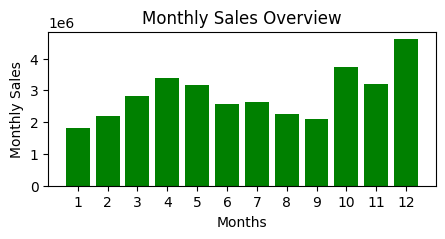

In [19]:
plt.figure(figsize=(5,2))
month = range(1,13)
plt.bar(month, monthly_sales, color ='green', width = 0.8)
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Monthly Sales")
plt.title("Monthly Sales Overview")
plt.show()

#### Which city has the highest sale?
Now, again we ran into problem. The problem is we do not have separate city name, we have full purchase address. Need to make separate column for city.

We need to cleanup the purchase address, for this we will define the function and make use of lamda function which will be very helpful to grab the cell content.

In [20]:
def get_city(address):
    return address.split(',')[1] #[1] return the first index after the comma.

cleaned_data['city'] = cleaned_data['purchase_address'].apply(lambda x: get_city(x))
cleaned_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### we got the city name, but there are many cities that may be overlapping so we should include the state name also. For this lets define another similar function with lambda function.

In [21]:

def get_state(address):
    return address.split(',')[2].split(' ')[1] #[2] returns the second index after the comma.

cleaned_data['city'] = cleaned_data['purchase_address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})' )
cleaned_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
cleaned_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Which city had the highest sales?

In [23]:

highest_city_sales = cleaned_data.groupby('city').sum()['sales']
columns_to_exclude = ['order_id'] 
highest_city_sales = highest_city_sales.drop(columns = columns_to_exclude)
highest_city_sales

city
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: sales, dtype: float64

In [24]:
max_sales_bycity= highest_city_sales.max()
print(max_sales_bycity)
max_sales_city = highest_city_sales.idxmax()
print(max_sales_city)

8262203.91
 San Francisco (CA)


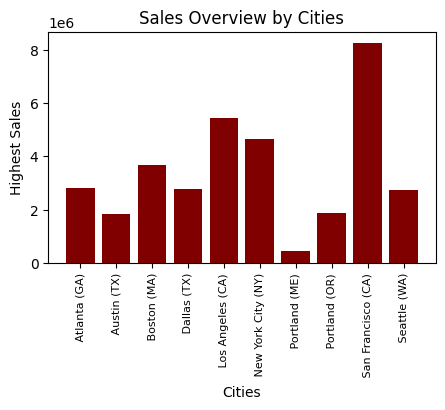

In [25]:
plt.figure(figsize=(5,3))
cities = [city for city, df in cleaned_data.groupby('city')] #if we don't make the order of cities as same order of dataframe we may get ambigious plot.
plt.bar(cities, highest_city_sales, color ='maroon', width = 0.8)
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel("Cities")
plt.ylabel("Highest Sales")
plt.title("Sales Overview by Cities")
plt.show()

### Which time is the peak time of placing order?
For this, lets convert the Order Date column into datetime object so that we can perform some manipulation.

In [26]:
cleaned_data['order_date'] = pd.to_datetime(cleaned_data['order_date'])
cleaned_data['hour'] = cleaned_data['order_date'].dt.hour
cleaned_data['minute'] = cleaned_data['order_date'].dt.minute
cleaned_data.head()




C:\Users\prabh\AppData\Local\Temp\ipykernel_15352\2306127984.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['order_date'] = pd.to_datetime(cleaned_data['order_date'])


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


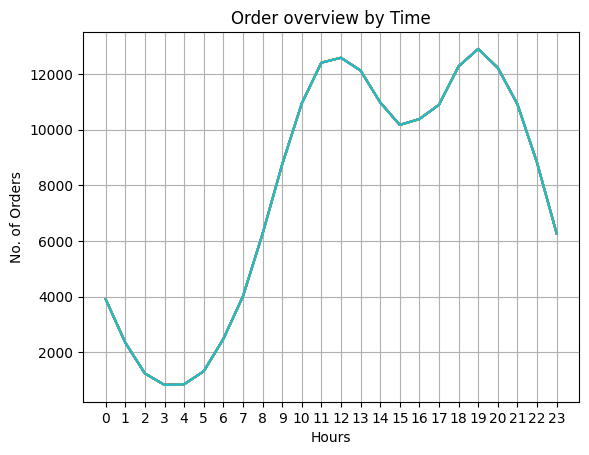

In [27]:
hours = [ hour for hour, df in cleaned_data.groupby('hour')]

plt.plot(hours, cleaned_data.groupby(['hour']).count())
plt.xticks(hours)
plt.title('Order overview by Time')
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

### Which products are most often sold together?

In [28]:
df = cleaned_data[cleaned_data['order_id'].duplicated(keep=False)]
df['grouped'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))
#we will get duplicates value while implementing this code only, as the product will add to both single items from the same order id.
df = df[['order_id','grouped']].drop_duplicates()
df.head(10)
#the resulting df will contain rows where 'order_id' column has duplicate values. The keep=False ensures that all instances are retained in the result.

C:\Users\prabh\AppData\Local\Temp\ipykernel_15352\495884608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))


,order_id,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #we can use 2,3 in which order we wanna see the data



In [30]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


lets make the output in readable fashion.

In [31]:

'''collections.Counter class is used to count the frequency of elements in a collection. most_common() method of the Counter class is used to 
retrieve the elements with highest count in descending order.'''

'collections.Counter class is used to count the frequency of elements in a collection. most_common() method of the Counter class is used to \nretrieve the elements with highest count in descending order.'

### Which product sold the most? What might be the reason? 
Ans: AAA Batteries( 4-pack) sold the most.

In [32]:
cleaned_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [33]:
product_group = cleaned_data.groupby('product')
quantity_ordered = product_group['quantity_ordered'].sum()
quantity_ordered.head()



product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: quantity_ordered, dtype: int64

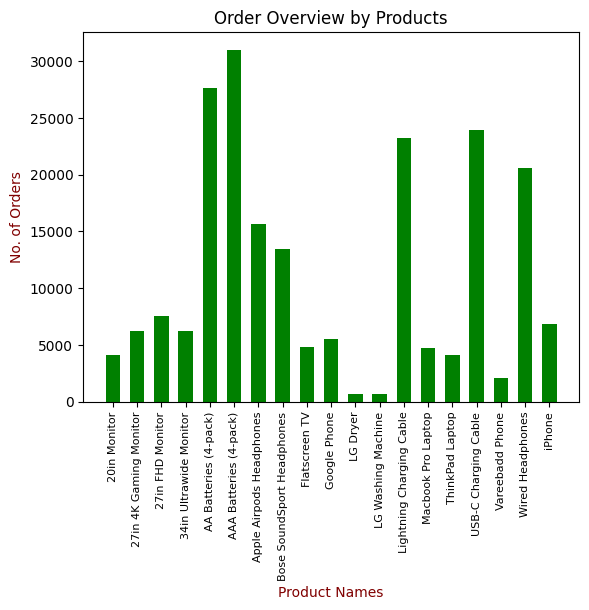

In [34]:
products = [ product for product, df in product_group]

plt.bar(products, quantity_ordered, color = 'green', width=0.6)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.title('Order Overview by Products')
plt.xlabel('Product Names', color= 'maroon')
plt.ylabel('No. of Orders', color = 'maroon')
plt.show()


In [35]:
prices = cleaned_data.groupby('product')['price_each'].mean()
prices



product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price_each, dtype: float64

### Adding the price data over the above bar showing the corelation between the price and the sales.

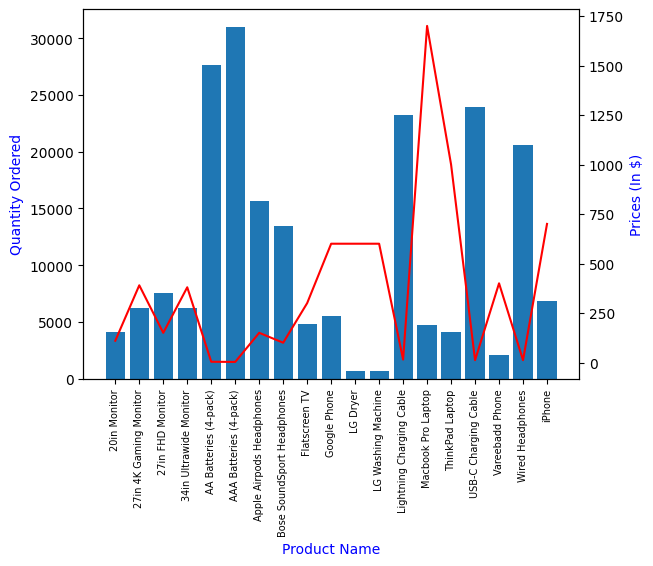

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, '-r')


ax1.set_xlabel('Product Name', color = 'blue')
plt.xticks(products, rotation = 'vertical', size = 8)
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Prices (In $)', color = 'blue')
ax1.set_xticklabels(products, rotation = 'vertical', size = 7)
plt.show()


# **END OF THE PROJECT**